In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

import os
import math
import numpy as np
import pandas as pd
from collections import Counter
from collections import defaultdict
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D,Conv2D, Flatten,MaxPool2D,Reshape,Activation,BatchNormalization,SpatialDropout1D,Dropout,Permute
from keras.layers.pooling import MaxPooling2D,MaxPooling1D
from keras import regularizers
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Using TensorFlow backend.


In [4]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

FileNotFoundError: [Errno 2] No such file or directory: 'X_test.npy'

In [5]:
c1 = Counter(y_train_valid)
d1 = Counter(person_train_valid[:,0])
print(c1)
print(d1)
c2 = Counter(y_test)
d2 = Counter(person_test[:,0])
print(c2)
print(d2)

Counter({771: 543, 772: 530, 769: 529, 770: 513})
Counter({6.0: 238, 0.0: 237, 1.0: 236, 2.0: 236, 5.0: 236, 4.0: 235, 3.0: 234, 7.0: 232, 8.0: 231})
Counter({770: 127, 769: 111, 772: 109, 771: 96})
Counter({0.0: 50, 1.0: 50, 2.0: 50, 3.0: 50, 6.0: 50, 7.0: 50, 5.0: 49, 4.0: 47, 8.0: 47})


In [6]:
Subject=np.array([0,1,2,3,4,5,6,7,8])
Class =np.array([769,770,771,772])
data=np.zeros([4,9])
for i in range(4):
    for j in range(9):
        loc=np.argwhere(person_train_valid==Subject[j])[:,0]
        data[i,j]=sum(y_train_valid[loc]==Class[i])

idx_name=['left','right','foot','tongue']
column_name=['Subject_0', 'Subject_1','Subject_2','Subject_3','Subject_4','Subject_5','Subject_6','Subject_7','Subject_8']
df = pd.DataFrame(data=data,index=idx_name, columns=column_name)
df.astype(np.int64)

,Subject_0,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8
left,60,60,56,66,55,57,59,60,56
right,59,57,60,54,60,55,54,56,58
foot,58,62,63,56,59,62,64,60,59
tongue,60,57,57,58,61,62,61,56,58


In [7]:
# Splitting data by subject 
person_train_valid = person_train_valid.astype(int)
person_test = person_test.astype(int)

ids = range(0, 9) # IDs 0-8 inclusive

train_valid_subject_idx = defaultdict(list) # key: id 0-8, value: list of indices of training data for that id 
test_subject_idx = defaultdict(list)

num_trials, num_channels, num_bins = X_train_valid.shape
num_test = X_test.shape[0]

for i in range(num_trials):
    train_valid_subject_idx[person_train_valid[i][0]].append(i)
    
for i in range(num_test):
    test_subject_idx[person_test[i][0]].append(i)
# Sanity check to see if partitioning by subject ID worked

print(len(train_valid_subject_idx[0]))
print(len(test_subject_idx[0]))   
# change the label in one-hot encoding
y_train_valid-=769
y_test-=769
y_train_valid_onehot = to_categorical(y_train_valid)
y_test_onehot= to_categorical(y_test)

237
50


In [8]:
# Split the training data and Validation data
# Remove the 1st decond which is the cue period
EEG_22=True
is_3s=False
n_sub = 10
split_size=0.2
#True:{1,2,3,5,10,15} False:{1,2,4,5,8,10,20}
if EEG_22==True:
    EEG_train_valid = X_train_valid[:,:22,:].reshape(-1,22,1000,1)
    EEG_test  = X_test[:,:22,:].reshape(-1,22,1000,1)
else:
    EEG_train_valid = X_train_valid[:,:25,:].reshape(-1,25,1000,1)
    EEG_test  = X_test[:,:25,:].reshape(-1,25,1000,1)

print ('Training/Valid data shape: {}'.format(EEG_train_valid.shape))
print ('Test data shape: {}'.format(EEG_test.shape))

n_train=int(2115*(1-split_size))
n_valid=int(2115*split_size)
n_test=443

EEG_train, EEG_valid, y_train, y_valid = train_test_split(
    EEG_train_valid, y_train_valid_onehot, test_size=split_size, shuffle=True)

print ('Original Training data shape: {}'.format(EEG_train.shape))
print ('Original Validation data shape: {}'.format(EEG_valid.shape))
print ('Original Testing data shape: {}'.format(EEG_test.shape))
EEG_3s_train=EEG_train[:,:,250:1000,:]
EEG_3s_valid=EEG_valid[:,:,250:1000,:]
EEG_3s_test=EEG_test[:,:,250:1000,:]
print ('3Second Training data shape: {}'.format(EEG_3s_train.shape))
print ('3Second Validation data shape: {}'.format(EEG_3s_valid.shape))
print ('3Second Testing data shape: {}'.format(EEG_3s_test.shape))

Training/Valid data shape: (2115, 22, 1000, 1)
Test data shape: (443, 22, 1000, 1)
Original Training data shape: (1692, 22, 1000, 1)
Original Validation data shape: (423, 22, 1000, 1)
Original Testing data shape: (443, 22, 1000, 1)
3Second Training data shape: (1692, 22, 750, 1)
3Second Validation data shape: (423, 22, 750, 1)
3Second Testing data shape: (443, 22, 750, 1)


### Down sample the original data

In [9]:
if is_3s==True:
    print("use the 3-seconds data:")
    new_train=np.zeros([n_train*n_sub,EEG_train.shape[1],750//n_sub,1],dtype='float64')
    new_valid=np.zeros([n_valid*n_sub,EEG_train.shape[1],750//n_sub,1],dtype='float64')
    new_test=np.zeros([n_test*n_sub,EEG_train.shape[1],750//n_sub,1],dtype='float64')    
else:
    print("use the 4-seconds data:")
    new_train=np.zeros([n_train*n_sub,EEG_train.shape[1],1000//n_sub,1],dtype='float64')
    new_valid=np.zeros([n_valid*n_sub,EEG_train.shape[1],1000//n_sub,1],dtype='float64')
    new_test=np.zeros([n_test*n_sub,EEG_train.shape[1],1000//n_sub,1],dtype='float64')
yy_train= np.zeros([new_train.shape[0],4],dtype='float64')
yy_valid= np.zeros([new_valid.shape[0],4],dtype='float64')
yy_test_onehot= np.zeros([new_test.shape[0],4],dtype='float64')
for i in range(n_sub)  :
    if is_3s==True:
        new_train[i*n_train:(i+1)*n_train]=EEG_3s_train[:,:,i:750:n_sub,:]
        new_valid[i*n_valid:(i+1)*n_valid]=EEG_3s_valid[:,:,i:750:n_sub,:]
        new_test[i*n_test:(i+1)*n_test]=EEG_3s_test[:,:,i:750:n_sub,:]
    else:
        new_train[i*n_train:(i+1)*n_train]=EEG_train[:,:,i:1000:n_sub,:]
        new_valid[i*n_valid:(i+1)*n_valid]=EEG_valid[:,:,i:1000:n_sub,:]
        new_test[i*n_test:(i+1)*n_test]=EEG_test[:,:,i:1000:n_sub,:]
    yy_train[i*n_train:(i+1)*n_train]= y_train
    yy_valid[i*n_valid:(i+1)*n_valid]=y_valid
    yy_test_onehot[i*n_test:(i+1)*n_test]=y_test_onehot
print ('New Training data shape: {}'.format(new_train.shape))
print ('New Validation data shape: {}'.format(new_valid.shape))
print ('New Testing data shape: {}'.format(new_test.shape))

use the 4-seconds data:
New Training data shape: (16920, 22, 100, 1)
New Validation data shape: (4230, 22, 100, 1)
New Testing data shape: (4430, 22, 100, 1)


### CNN Deep ConvNet Architecture (with down sample Data)
Input Dimension: 22x100x1
0. `Reshape`
<br>  Reshape: 100x22x1
1. `Conv-Pool Block`
<br>Convolutional layer with 25 10x1 kernels, with stride 1,1, same padding
<br>  $\longrightarrow$ 100x22x1

In [10]:
model = Sequential()
#model.add(Flatten(input_shape=(22,100,1)))
#model.add(Dense(11250,kernel_regularizer=regularizers.l2(0.01)))
#model.add(Reshape((30, 375,1)))
#model.add(Activation('elu'))
VarianceScaling=keras.initializers.VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None)

model.add(Permute(( 2,1,3),input_shape=(22,100,1)))

model.add(Conv2D(25, kernel_size=(10,1),kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(25, kernel_size=(1,22),kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization(axis=2))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(3, 1), strides=(3,1)))

model.add(Reshape((30,25)))
model.add(Conv1D(filters=50,kernel_size=3,activation=None, padding = 'same', kernel_regularizer=regularizers.l2(0.01))) 
model.add(BatchNormalization(axis=1))
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=3,strides=3))

model.add(SpatialDropout1D(rate=0.5))
model.add(Conv1D(filters=100,kernel_size=3,activation=None, padding = 'same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization(axis=1))
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=3,strides=3))

model.add(Conv1D(filters=200,kernel_size=3,activation=None, padding = 'same', kernel_regularizer=regularizers.l2(0.01)))
#model.add(BatchNormalization(axis=1))
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=3,strides=3))

model.add(Flatten())
model.add(Dense(units=4,use_bias=True,activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

print(model.summary())
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam= optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
rmsprop= optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_1 (Permute)          (None, 100, 22, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 91, 22, 25)        275       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 91, 1, 25)         13775     
_________________________________________________________________
batch_normalization_1 (Batch (None, 91, 1, 25)         4         
_________________________________________________________________
activation_1 (Activation)    (None, 91, 1, 25)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 1, 25)         0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 30, 25)            0         
__________

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
with tf.Session( config = tf.ConfigProto( log_device_placement = True ) ):
    #model.fit(new_train,yy_train,validation_data=(new_valid,yy_valid),epochs=500,batch_size=60,shuffle=True,callbacks=[early_stopping])
    history=model.fit(new_train,yy_train,validation_data=(new_valid,yy_valid),epochs=100,batch_size=60,shuffle=True)
    model.evaluate(x=new_test, y=yy_test_onehot)
    score=model.predict(x=new_test)    

Train on 16920 samples, validate on 4230 samples
Epoch 1/100
16920/16920 [==============================] - 22s 1ms/step - loss: 3.9448 - acc: 0.2936 - val_loss: 3.7735 - val_acc: 0.2976
Epoch 2/100
16920/16920 [==============================] - 2s 132us/step - loss: 3.6103 - acc: 0.3441 - val_loss: 3.4872 - val_acc: 0.3314
Epoch 3/100
16920/16920 [==============================] - 2s 132us/step - loss: 3.3190 - acc: 0.3991 - val_loss: 3.2096 - val_acc: 0.3936
Epoch 4/100
16920/16920 [==============================] - 2s 133us/step - loss: 3.0292 - acc: 0.4652 - val_loss: 2.9150 - val_acc: 0.4610
Epoch 5/100
16920/16920 [==============================] - 2s 135us/step - loss: 2.7554 - acc: 0.5216 - val_loss: 2.6576 - val_acc: 0.5258
Epoch 6/100
16920/16920 [==============================] - 2s 135us/step - loss: 2.5157 - acc: 0.5665 - val_loss: 2.4671 - val_acc: 0.5426
Epoch 7/100
16920/16920 [==============================] - 2s 134us/step - loss: 2.2960 - acc: 0.6042 - val_loss: 2.31

[1.2252564137999145, 0.6652370202891176]

In [12]:
y_score=np.zeros([y_test.shape[0],4],dtype='float64')
for i in range(n_sub)  :
    y_score+=np.log(score[i*n_test:(i+1)*n_test])
y_pred=np.argmax(y_score,axis=1)
print ('Testing data accuracy is: {}'.format(sum(y_pred==y_test)/y_test.shape[0]))

Testing data accuracy is: 0.6975169300225733


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

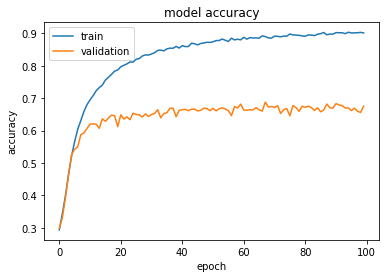

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

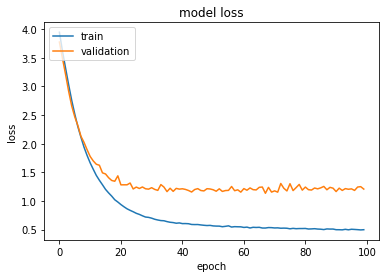

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Confusion Matrix

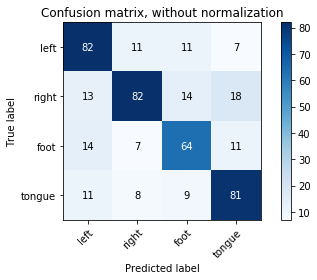

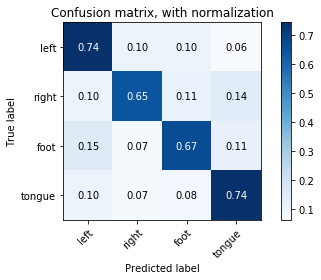

In [14]:
class_names = np.array(['left','right','foot','tongue'])
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true,y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
   # else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test, y_pred, classes=class_names,normalize=True,
                      title='Confusion matrix, with normalization')

### The accuracy for each subject

In [15]:
data=np.zeros([9,1])
for i in range(9):
        data[i]=sum(y_pred[test_subject_idx[i]]==y_test[test_subject_idx[i]])/len(test_subject_idx[i])

column_name=['CNN++']
idx_name=['Subject_0', 'Subject_1','Subject_2','Subject_3','Subject_4','Subject_5','Subject_6','Subject_7','Subject_8']
df = pd.DataFrame(data=data,index=idx_name, columns=column_name)
df

,CNN++
Subject_0,0.620000
Subject_1,0.520000
Subject_2,0.860000
Subject_3,0.720000
Subject_4,0.787234
Subject_5,0.612245
Subject_6,0.720000
Subject_7,0.720000
Subject_8,0.723404
